# EE2703: APPLIED PROGRAMMING LAB
## ASSIGNMENT 8: IMAGE RECONSTRUCTION
### ATREYA VEDANTAM, EE22B004

Our task is to reconstruct an image. Below lies a general-purpose class which I have constructed to carefully walk through all the steps in the assignment.

In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
class ImgReconstructor:
    
    # initializes the class variables
    def __init__(self, C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obst, src):
        self.C = C
        self.Nsamp = Nsamp
        self.Nmics = Nmics
        self.pitch = pitch
        self.dist_per_samp = dist_per_samp
        self.SincP = SincP
        self.t = [round(i*self.dist_per_samp, 3) for i in range(0, self.Nsamp)] # CODE Nsamp time instants with spacing of dist_per_samp
        self.mics = [[0, round(i*self.pitch + self.pitch/2, 3)] for i in range(-int(self.Nmics/2), int(self.Nmics/2))]
        self.srcwfrm = self.wsrc()
        self.obst = obst
        self.src = src
        
    # source waveform
    def wsrc(self):
        t = np.array(self.t)
        return np.sinc(self.SincP*t)
    
    def time(self):
        return self.t

    # calculates the distance between the source, the obstacle and the mic
    def dist(self, pt, mic):
        pt, mic = np.array(pt), np.array(mic)
        d1 = np.sqrt(np.sum(np.square(np.subtract(self.src, pt)))) # CODE distance from src to pt
        d2 = np.sqrt(np.sum(np.square(np.subtract(pt, mic)))) # CODE distance from pt to mic
        return d1 + d2

    # returns an array of the signals recieved by a specific microphone at each timestep
    def micOutput(self, mic):
        micloc = self.mics[mic]
        distance = self.dist(pt=self.obst, mic=micloc)
        timedelay = distance/self.C
        output = []
        for time in self.t:
            if time < timedelay:
                output.append(0)
            else:
                output.extend(self.srcwfrm)
                break
        return output[:self.Nsamp]
    
    # combines all the micOutputs and returns a two dimensional representation of the image captured
    def waveforms(self):
        wave = []
        for i in range(self.Nmics):
            wave.append(self.micOutput(i))
        return wave
        
    # gives the amplitude of probability of the existence of the image at a specific i, j location (pos)
    def ijamplitude(self, pos, sig=[[]]):
        amp = 0
        if sig==[[]]:
            signal = self.waveforms()
        else:
            signal = sig  # this is in case the image capture needn't be generated, and it is given externally
        for a in range(self.Nmics):
            d = self.dist(pos, self.mics[a])
            t = d/self.C
            if int(t/self.dist_per_samp) < self.Nsamp-1:
                amp += signal[a][int(t/self.dist_per_samp) + 1]
        return amp
    
    # reconstructs the location of the obstacle using DAS algorithm
    def reconstruct(self, txtdata=[[]]):
        imgrecons = []
        for i in range(int(self.Nsamp/2)):
            temp = []
            for j in range(self.Nmics):
                obPos = (i*self.dist_per_samp, round((j-int(self.Nmics/2))*self.pitch + self.pitch/2, 3))
                if txtdata == [[]]:
                    construct = self.ijamplitude(obPos)
                else:
                    construct = self.ijamplitude(obPos, txtdata)  # from the external text data, obtain the amplitude at i, j (object position)
                temp.append(round(construct, 3))
            imgrecons.append(temp)
        return imgrecons

In [155]:
# parameters of the problem

Nmics = 50
Nsamp = 50
src = (0, 0)
pitch = 0.1
dist_per_samp = 0.1
C = 0.5
SincP = 5.0
mics = [[0, round(i*pitch + pitch/2, 3)] for i in range(-int(Nmics/2), int(Nmics/2))]
obstacle = (3, -1)

## Question 1

Without changing the given parameters, a plot of the $\texttt{Sinc}$ wave is shown below. (The answers to Q1 lie in the next two markdown blocks).

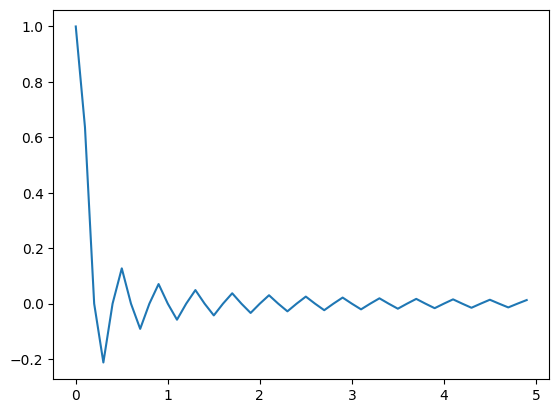

In [156]:
img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)
sincwave = img.wsrc()
t = img.time()
plt.plot(t, sincwave)

As we can see, the $\texttt{sinc}$ function is very sharp-edged because the timestep ($\texttt{dist_per_samp}$) is too large. To make it more smooth, like what we are required to get, we decrease this parameter to 0.02. On decreasing the parameter however, we see that the amount of time decreases and hence to keep it constant at 5, we need to increase $\texttt{Nsamp}$ correspondingly to 250. Furthermore, $\texttt{SincP}$ is representative of the frequency of the $\texttt{sinc}$ function. We are required to get a lower frequency, so we decrease that to 2.0 as well.

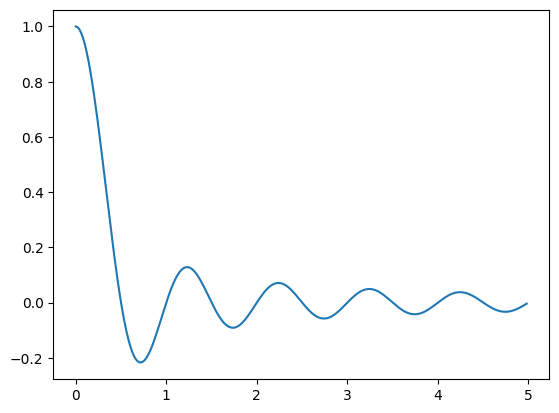

In [157]:
dist_per_samp = 0.02
Nsamp = 250
SincP = 2.0

img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)
sincwave = img.wsrc()
t = img.time()
plt.plot(t, sincwave)

If we want the frequency of the $\texttt{sinc}$ function to increase, we increase $\texttt{SincP}$ to 10.0. Effect on the final image: increasing the frequency makes the $\texttt{sinc}$ drop to 0 sharply and hence increases the resolution of the image. End of Answer to Q1.

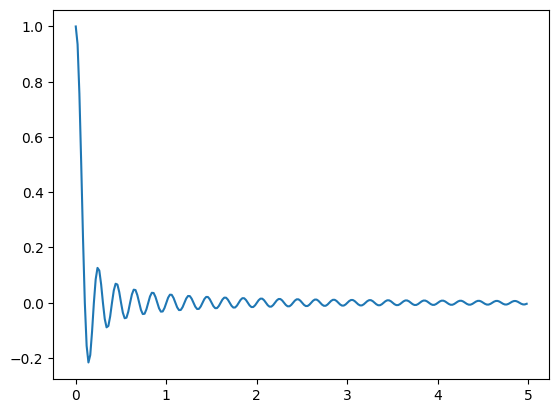

In [158]:
SincP = 10.0

img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)
sincwave = img.wsrc()
t = img.time()
plt.plot(t, sincwave)

## Setup and Generating Mic Output

Below is an example of the output of the 3rd mic, to demonstrate the usefulness of the $\texttt{micOutput}$ function which was required to be coded up. As one can see this code is fully parameterized.

In [159]:
Nmics = 64
Nsamp = 200
C = 2.0
obstacle = (3, -1)
dist_per_samp = 0.1
SincP = 2.0

img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)
examplemicOutput = img.micOutput(3)
print(examplemicOutput)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0.935489283788639, 0.756826728640657, 0.5045511524271047, 0.23387232094715982, 3.8981718325193755e-17, -0.15591488063143982, -0.21623620818304484, -0.18920668216016426, -0.10394325375429327, -3.8981718325193755e-17, 0.08504448034442179, 0.12613778810677617, 0.11643488132933186, 0.06682066312775996, 3.8981718325193755e-17, -0.05846808023678991, -0.0890384386636067, -0.0840918587378508, -0.04923627809413893, -3.8981718325193755e-17, 0.044547108751839926, 0.06880242987642339, 0.06581101988179631, 0.03897872015785999, 3.898171832519376e-17, -0.035980357068793774, -0.05606123915856718, -0.054059052045761224, -0.03225825116512552, -3.8981718325193755e-17, 0.030177073670601226, 0.04730167054004105, 0.045868286584282256, 0.027514390699665887, 3.8981718325193755e-17, -0.02598581343857328, -0.04090955289949496, -0.03983298571792933, -0.02398690471252924, -3.8981718325193755e-17, 0.02281681

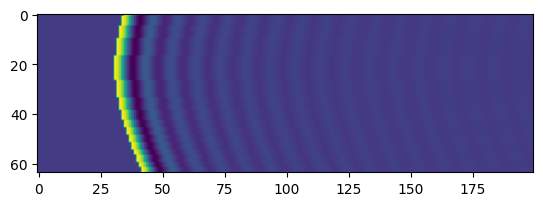

In [160]:
allmics = img.waveforms()
plt.imshow(allmics)

## Delay and Sum Algorithm

Below is the implementation of the DAS algorithm.

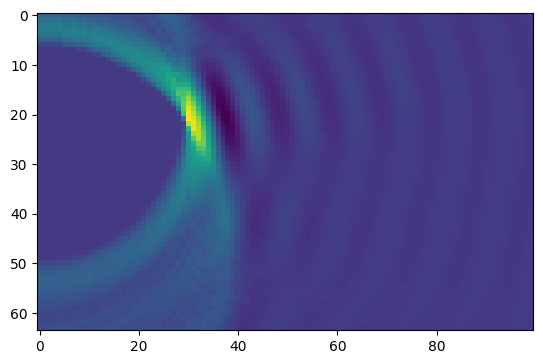

In [161]:
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

## Question 2

No, it does not make sense to reconstruct till $\texttt{Nsamp}$. This is because the furthest object that can be detected by the mics is when it takes roughly $\texttt{Nsamp}/2$ seconds for sound to travel there. Hence while reconstructing, no object beyond $\texttt{Nsamp}/2$ distance (in time units) can be detected. Of course, this is a loose bound. The time taken to travel to the extreme mics is even more and this rules out more locations at high $\texttt{time}$ and high $\texttt{y-position}$. However I have chosen to not include those as I feel the increase in the complexity of the code is not worth the reduction possible obstacle locations.

Hence, a more reasonable upper bound for the x-axis during reconstruction is $\texttt{Nsamp}/2$.

## Question 3

As seen in the above code block, the object is highly likely to be at (30, 22). This is intuitively right because we know that the obstacle is supposed to be at (3, -1). The x-distance is 3. Since $\texttt{dist_per_samp}$ is 0.1, a distance of 3 units is represented as 30. The y-distance is -1. We see that $\texttt{mics[0]}$ represents the bottom-most mic with a location of $[0, -3.15]$. Hence 22 represents the 22nd mic from the bottom which lies at $[0, -0.95]$. Since the object positions while reconstructing the image also lie, spaced by $\texttt{pitch}$, we expect that the position (3, -1) corresponds in this discretized domain to (30, 22).

In [162]:
print(reconstructed[30][22])  # the amplitude of the existence of an obstacle - observed to be high as expected

54.935


## Question 4

As discussed in Question 2, the maximum $x$-coordinate is 10 and the maximum $y$-coordinate is 3. The reconstructed plot is shown below. One can easily see that the tiniest bit of yellow is present in the rightmost corner, indicating that the reconstruction for that obstacle has barely worked and this is an edge case.

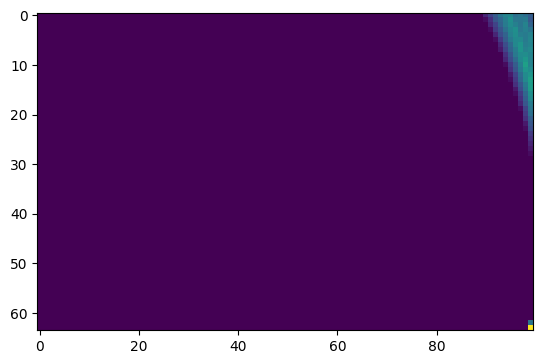

In [163]:
obstacle = (10, 3)

img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

## Question 5

If $\texttt{C}$ is decreased the image looks sharper. This is because smaller speeds implies sharper viewing of the waveform (an obstacle at the same distance would take longer time to be detected and therefore the discretization of time induces smaller errors).

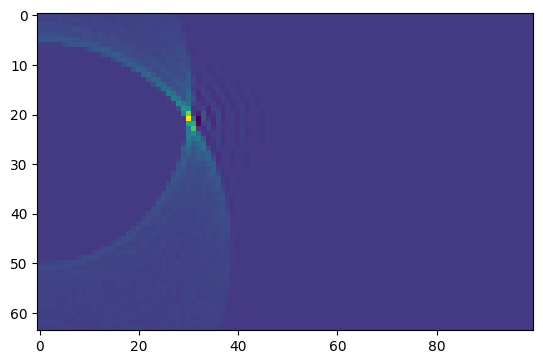

In [164]:
C = 0.5
obstacle = (3, -1)

img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

## Question 6

As $\texttt{Nmics}$ is increased, the y-range of the plot increases and we are able to see more of the objects location amplitude. This helps us pinpoint the object better. Consider the three images below, all of which have the same $\texttt{Nsamp}$ but have different $\texttt{Nmics}$. The difference is plainly visible - the first image has a vertical yellow strip making it indiscernible within the strip. The second one offers a bit more clarity and the third one tells us the location of the object the best.

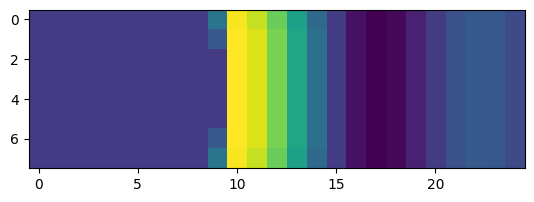

In [165]:
C = 2.0
Nmics = [8, 32, 64]
Nsamp = [50, 100, 200]
obstacle = (1, 0)  # the object position has been changed so that the object never lies outside the region in which reconstruction is possible

img = ImgReconstructor(C, Nsamp[0], Nmics[0], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

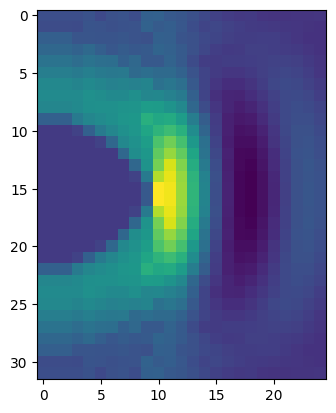

In [166]:
img = ImgReconstructor(C, Nsamp[0], Nmics[1], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

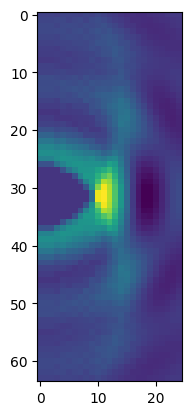

In [167]:
img = ImgReconstructor(C, Nsamp[0], Nmics[2], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

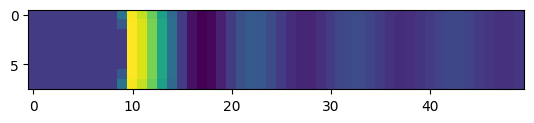

In [168]:
img = ImgReconstructor(C, Nsamp[1], Nmics[0], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

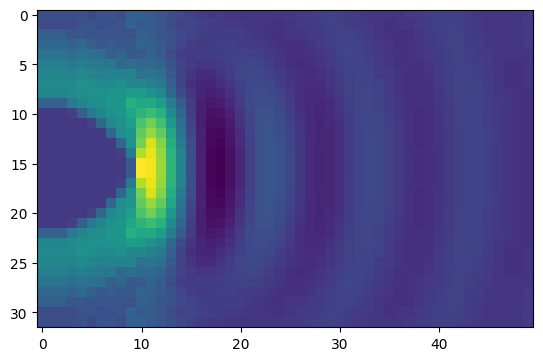

In [169]:
img = ImgReconstructor(C, Nsamp[1], Nmics[1], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

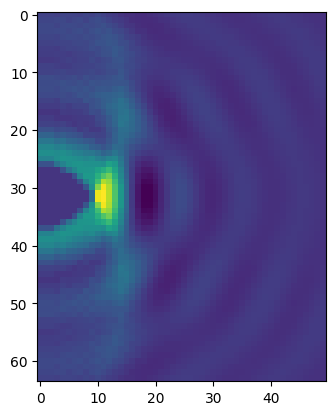

In [170]:
img = ImgReconstructor(C, Nsamp[1], Nmics[2], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

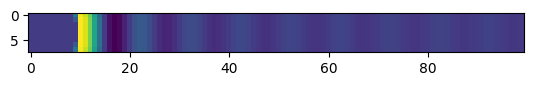

In [171]:
img = ImgReconstructor(C, Nsamp[2], Nmics[0], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

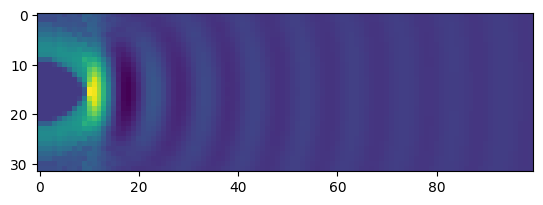

In [172]:
img = ImgReconstructor(C, Nsamp[2], Nmics[1], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

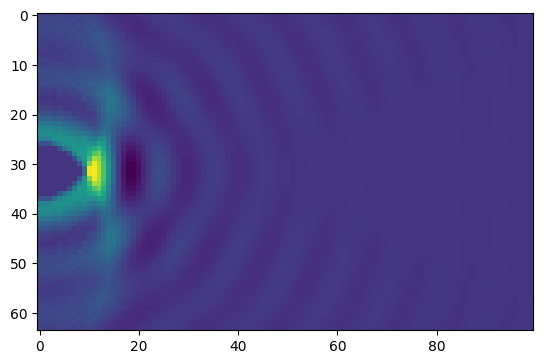

In [173]:
img = ImgReconstructor(C, Nsamp[2], Nmics[2], pitch, dist_per_samp, SincP, obstacle, src)
reconstructed = img.reconstruct()
plt.imshow(np.transpose(reconstructed))

## ADDENDUM

I have now reconstructed the obstacle for the given text files $\texttt{rx2.txt}$ and $\texttt{rx3.txt}$. The necessary changes to the ImgReconstructor class have been made for these two plots.

In [174]:
Nsamp = 200
Nmics = 64
dist_per_samp = 0.1
C = 0.5
img = ImgReconstructor(C, Nsamp, Nmics, pitch, dist_per_samp, SincP, obstacle, src)

/tmp/ipykernel_180385/2708458457.py:66: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if txtdata == [[]]:
/tmp/ipykernel_180385/2708458457.py:49: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sig==[[]]:


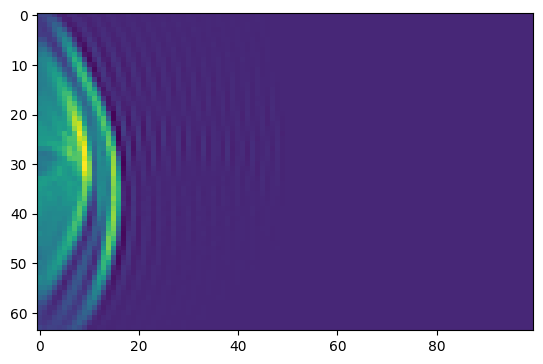

In [175]:
rx2 = np.loadtxt('rx2.txt')
reconstructed = img.reconstruct(txtdata=rx2)
plt.imshow(np.transpose(reconstructed))

/tmp/ipykernel_180385/2708458457.py:66: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if txtdata == [[]]:
/tmp/ipykernel_180385/2708458457.py:49: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sig==[[]]:


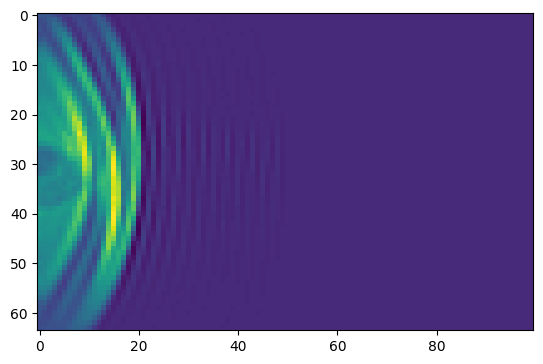

In [176]:
rx3 = np.loadtxt('rx3.txt')
reconstructed = img.reconstruct(txtdata=rx3)
plt.imshow(np.transpose(reconstructed))